# EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/UIT/IS252/Data Mining/Click_Through_Rate Prediction Data/Clean_Data_V2.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,month,day,hour
0,62.26,32.0,69481.85,172.83,96,234,1,174,0,5,8,21
1,41.73,31.0,61840.26,207.17,301,460,1,166,0,0,15,17
2,44.40,30.0,57877.15,172.83,484,379,0,71,0,5,28,10
3,59.88,28.0,56180.93,207.17,24,269,0,205,0,5,20,14
4,49.21,30.0,54324.73,201.58,484,495,0,149,1,6,20,10


# Histogram

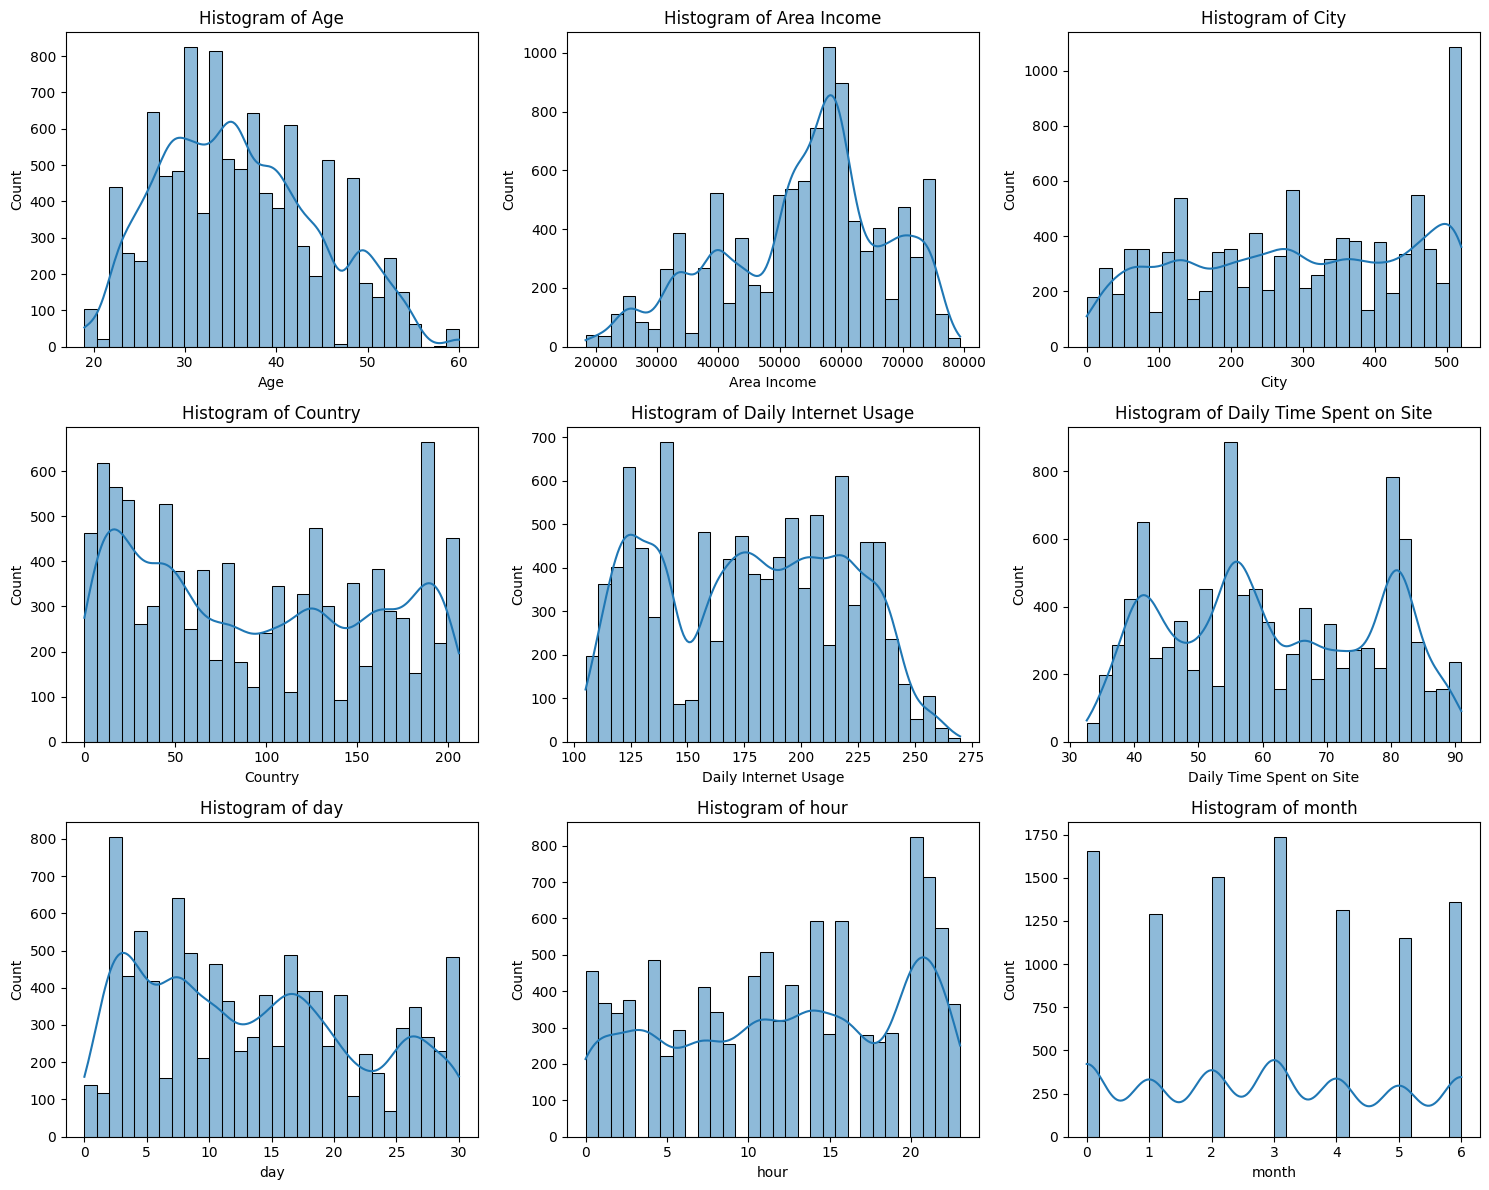

In [ ]:
cols_to_plot = data.columns.difference(['Gender', 'Clicked on Ad', 'Ad Topic Line'])
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Scatter Plot

## Daily Time Spent on Site vs Age

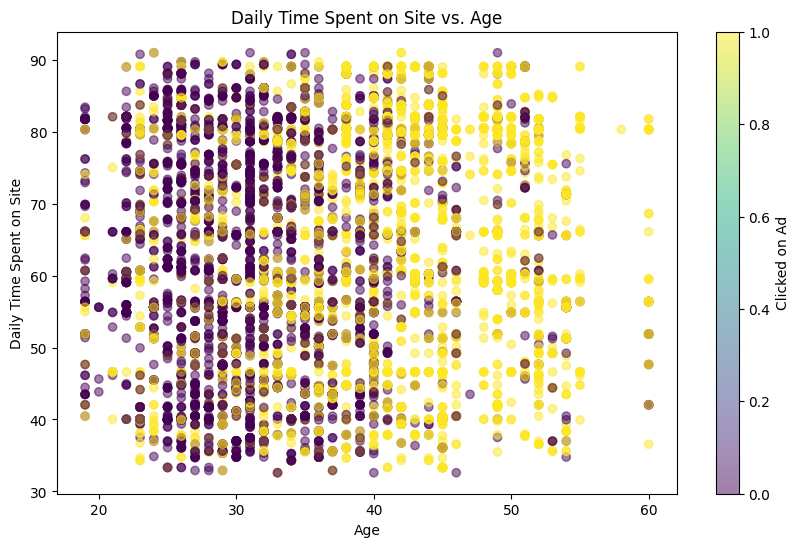

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Daily Time Spent on Site'], c=data['Clicked on Ad'], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site')
plt.title('Daily Time Spent on Site vs. Age')
_ = plt.colorbar(label='Clicked on Ad')

#### Nhận xét: ở độ tuổi 40-55 có tỉ lệ click vào rất cao

## Area Income vs. Daily Internet Usage

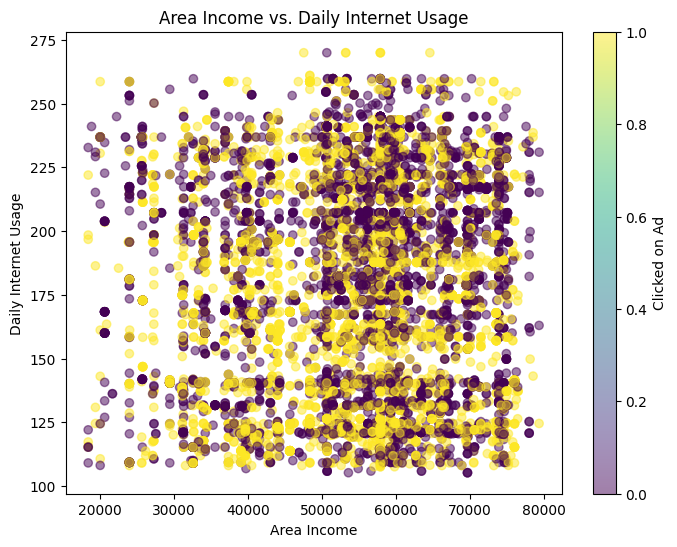

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Area Income'], data['Daily Internet Usage'], c=data['Clicked on Ad'], cmap='viridis', alpha=0.5)
plt.title('Area Income vs. Daily Internet Usage')
plt.xlabel('Area Income')
plt.ylabel('Daily Internet Usage')
_ = plt.colorbar(label='Clicked on Ad')

#### Nhận xét: Khu vực 40000-50000 gần như đa số đều click vào

# Correlation Map

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  int64  
 5   City                      10000 non-null  int64  
 6   Gender                    10000 non-null  int64  
 7   Country                   10000 non-null  int64  
 8   Clicked on Ad             10000 non-null  int64  
 9   month                     10000 non-null  int64  
 10  day                       10000 non-null  int64  
 11  hour                      10000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


In [ ]:
numerical_features = data.select_dtypes(include=['float64'])
categorical_features = data.select_dtypes(include=['int64'])

In [ ]:
numerical_features.columns, categorical_features.columns

(Index(['Daily Time Spent on Site', 'Age', 'Area Income',
        'Daily Internet Usage'],
       dtype='object'),
 Index(['Ad Topic Line', 'City', 'Gender', 'Country', 'Clicked on Ad', 'month',
        'day', 'hour'],
       dtype='object'))

In [ ]:
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,10000.0,61.660757,15.704142,32.60,48.86,59.59,76.58,90.97
Age,10000.0,35.940100,8.572973,19.00,29.00,35.00,42.00,60.00
Area Income,10000.0,53981.560251,13145.587194,18368.57,44248.52,56180.93,61840.26,79332.33
Daily Internet Usage,10000.0,177.759831,40.820951,105.22,140.15,178.92,212.67,269.96


<Axes: >

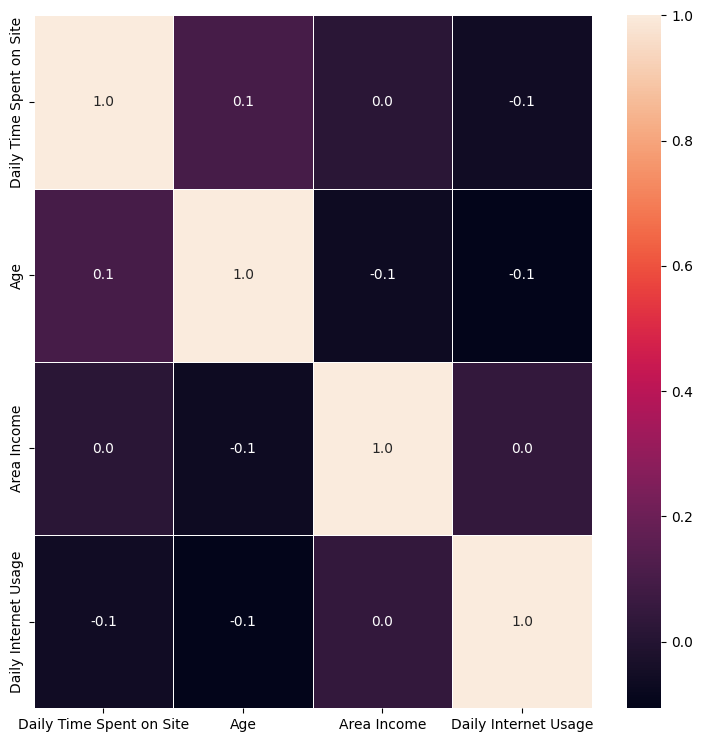

In [ ]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(numerical_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<Axes: >

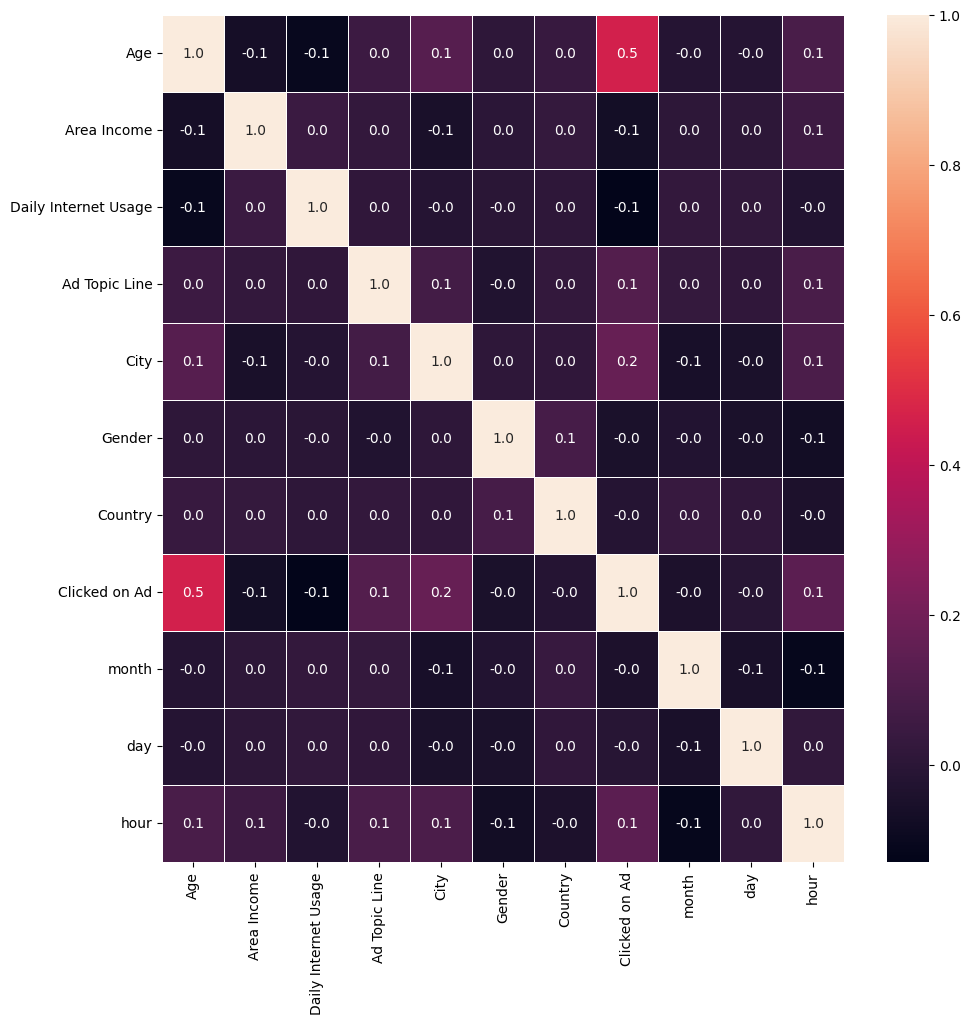

In [ ]:
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(data.iloc[:, 1:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Count of Clicked on Ad and Gender

<ipython-input-42-33bd0b6a14bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=data, palette='viridis', order=data[var].value_counts().index)
<ipython-input-42-33bd0b6a14bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=var, data=data, palette='viridis', order=data[var].value_counts().index)


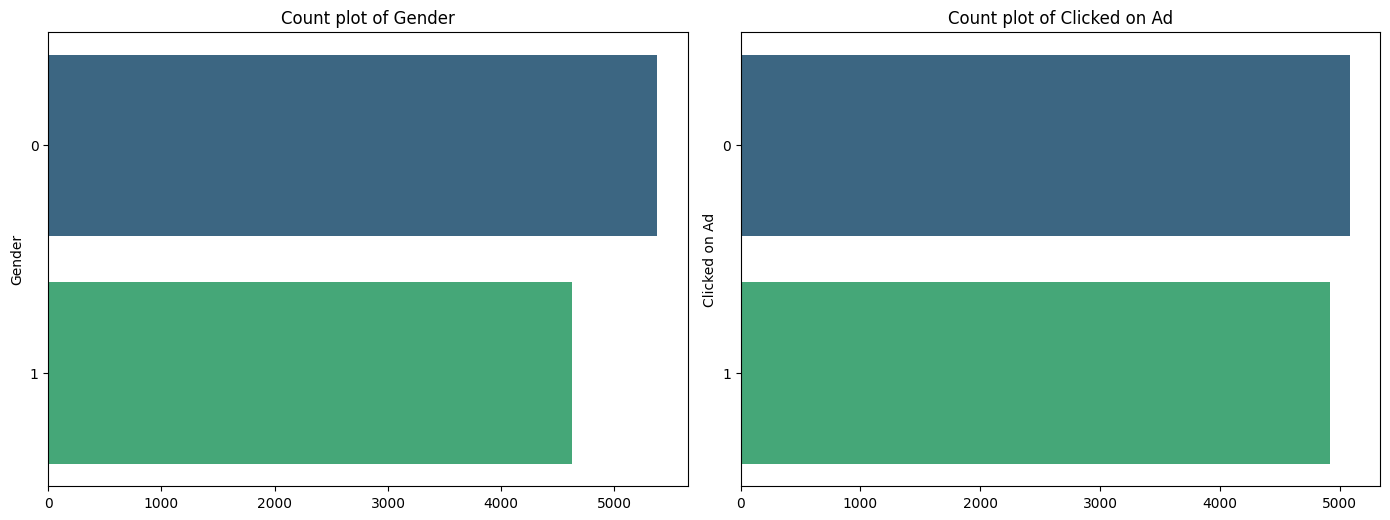

In [ ]:
plt.figure(figsize=(14, 10))
binary_values = ['Gender', 'Clicked on Ad']
for i, var in enumerate(binary_values):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=var, data=data, palette='viridis', order=data[var].value_counts().index)
    plt.title(f'Count plot of {var}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Relationship between time and Clicked on Ad

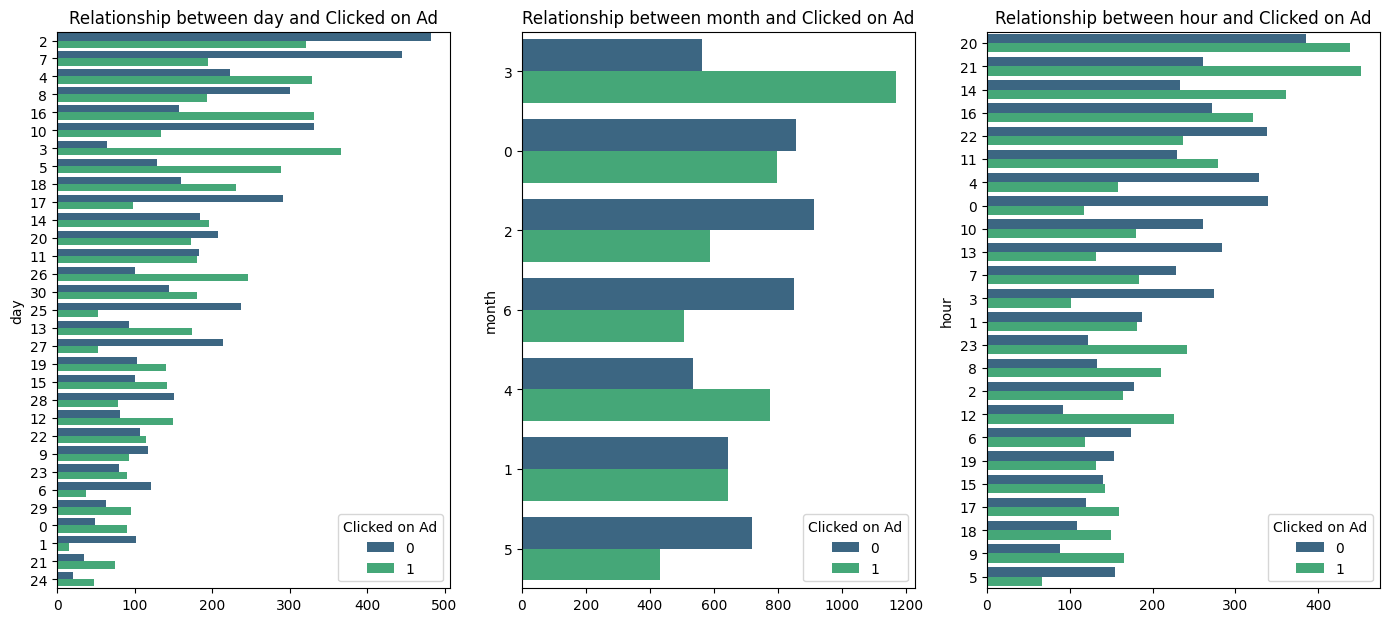

In [ ]:
plt.figure(figsize=(14, 18))
time_values = ['day', 'month', 'hour']
for i, var in enumerate(time_values):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=var, hue='Clicked on Ad', data=data, palette='viridis', order=data[var].value_counts().index)
    plt.title(f'Relationship between {var} and Clicked on Ad')
    plt.xlabel('')
plt.tight_layout()
plt.show()

<ipython-input-45-8b336389425f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Clicked on Ad', y=var, data=data, palette='viridis')
<ipython-input-45-8b336389425f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Clicked on Ad', y=var, data=data, palette='viridis')
<ipython-input-45-8b336389425f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Clicked on Ad', y=var, data=data, palette='viridis')
<ipython-input-45-8b336389425f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

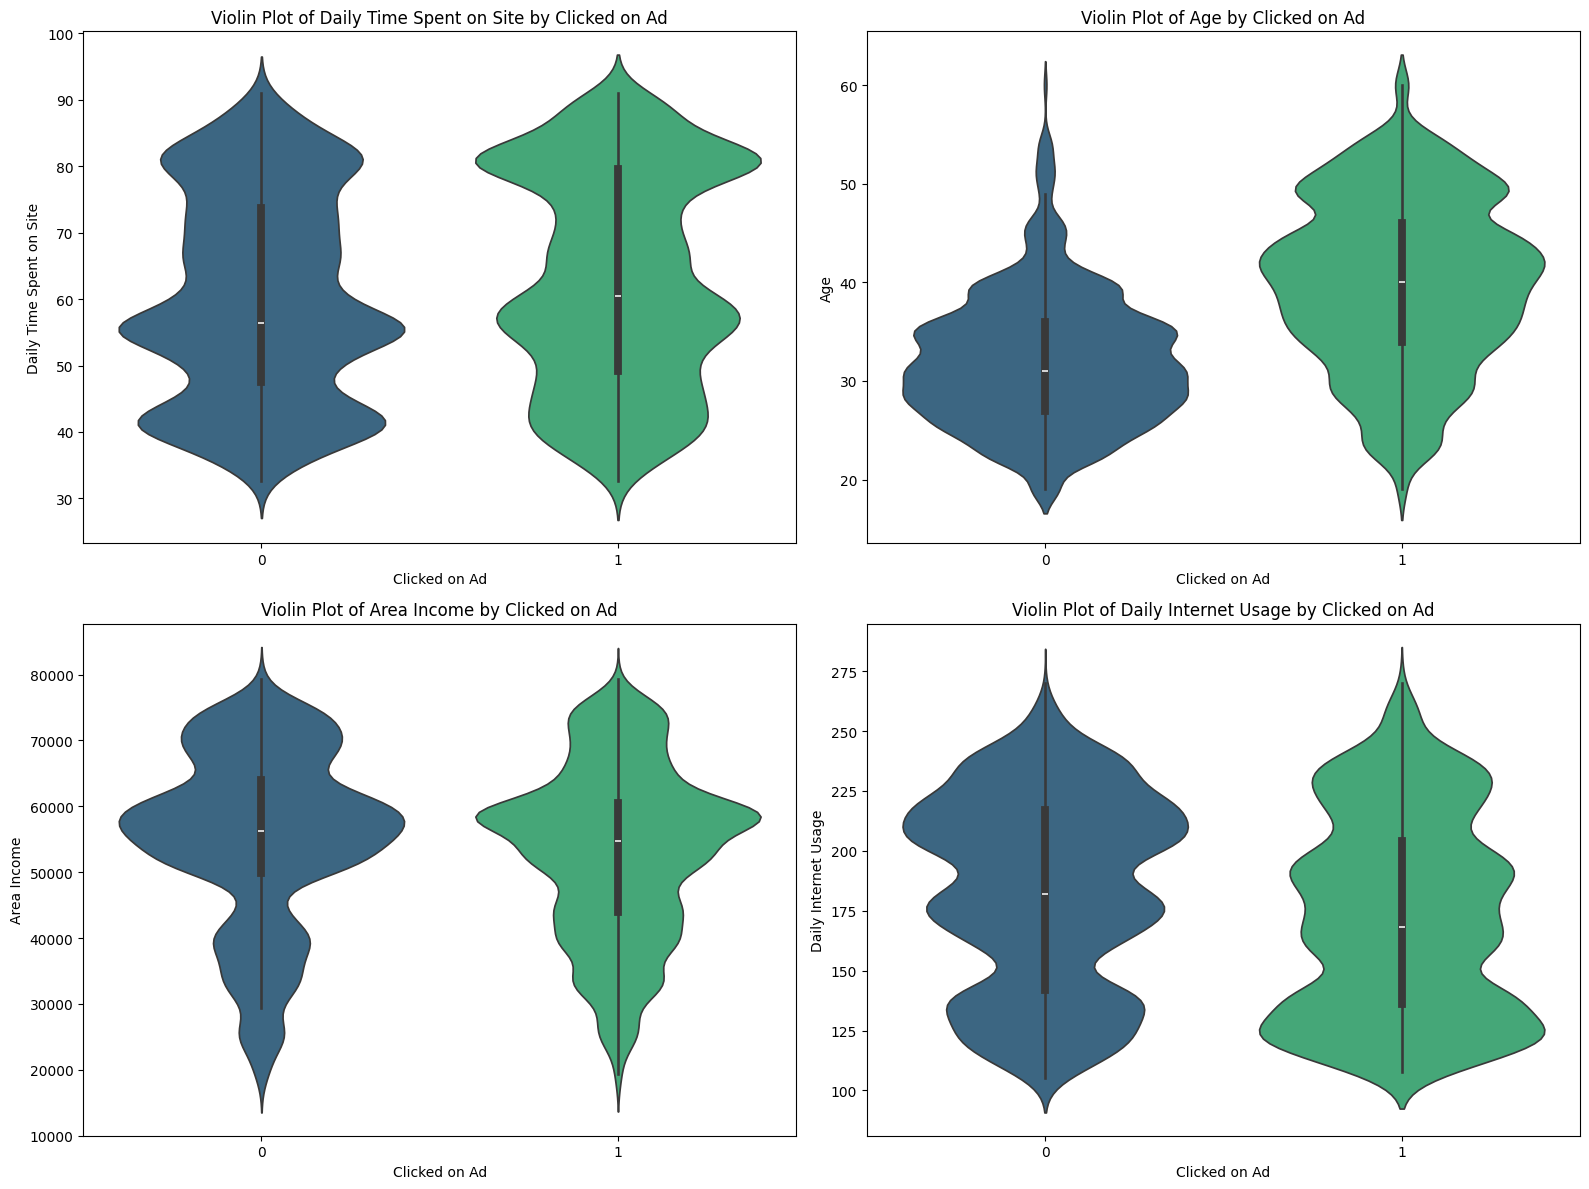

In [ ]:
plt.figure(figsize=(16, 12))
for i, var in enumerate(numerical_features.columns):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='Clicked on Ad', y=var, data=data, palette='viridis')
    plt.title(f'Violin Plot of {var} by Clicked on Ad')

plt.tight_layout()
plt.show()